Image credit: European Union, [Economies of scope in the aggregation of health-related data](https://joint-research-centre.ec.europa.eu/system/files/2021-09/jrc125767.pdf), under [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).

Python source: [451-blog/logreg.py at main · doabell/451-blog](https://github.com/doabell/451-blog/blob/main/posts/logistic-regression/logreg.py)

Instructions can be found at [Optimization for Logistic Regression](https://middlebury-csci-0451.github.io/CSCI-0451/assignments/blog-posts/blog-post-optimization.html).

## Demo


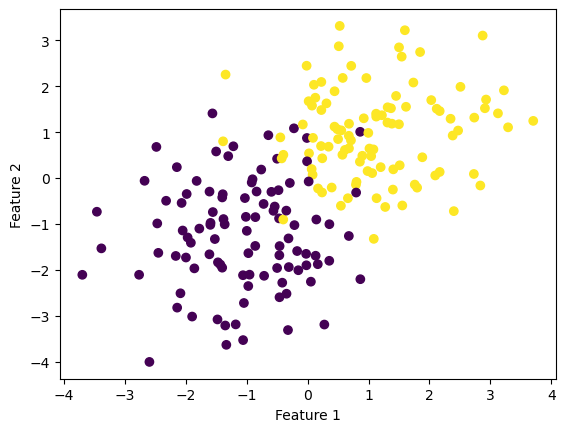

In [1]:
# Data
from logreg import LogisticRegression
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore')
np.random.seed(283)

# make the data
p_features = 3
X, y = make_blobs(
    n_samples=200, n_features=p_features - 1, centers=[(-1, -1), (1, 1)]
)

fig = plt.scatter(X[:, 0], X[:, 1], c=y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")


array([1.7836042 , 1.19609433, 1.39967122])

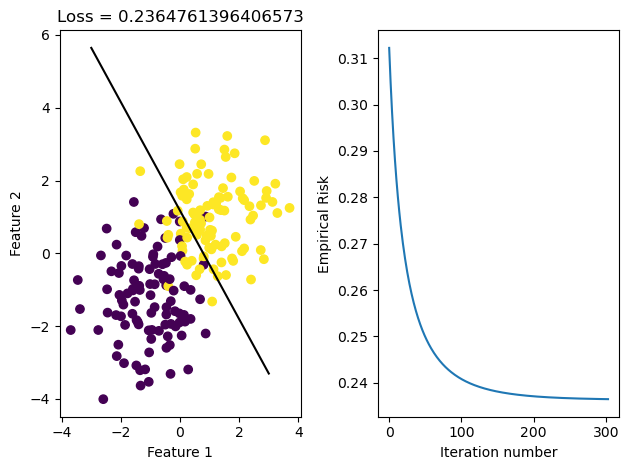

In [7]:
# Algorithm
# fit the model

LR = LogisticRegression()
LR.fit(X, y, alpha=0.001, max_epochs=1000)

fig, axarr = plt.subplots(1, 2)

axarr[0].scatter(X[:, 0], X[:, 1], c=y)
axarr[0].set(xlabel="Feature 1", ylabel="Feature 2",
             title=f"Loss = {LR.loss_history[-1]}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (LR.w[2] - f1*LR.w[0])/LR.w[1], color="black")

axarr[1].plot(LR.loss_history)
axarr[1].set(xlabel="Iteration number", ylabel="Empirical Risk")
plt.tight_layout()


# inspect the fitted value of w
LR.w


In [3]:
# compare
LR = LogisticRegression()
LR.fit_stochastic(
    X, y,
    m_epochs=100,
    momentum=True,
    batch_size=10,
    alpha=.05
)

num_steps = len(LR.loss_history)
plt.plot(
    np.arange(num_steps) + 1, LR.loss_history,
    label="stochastic gradient (momentum)"
)

LR = LogisticRegression()
LR.fit_stochastic(
    X, y,
    m_epochs=100,
    momentum=False,
    batch_size=10,
    alpha=.1
)

num_steps = len(LR.loss_history)
plt.plot(
    np.arange(num_steps) + 1, LR.loss_history,
    label="stochastic gradient"
)

LR = LogisticRegression()
LR.fit(X, y, alpha=.05, max_epochs=100)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label="gradient")

plt.loglog()

legend = plt.legend()


AttributeError: 'LogisticRegression' object has no attribute 'fit_stochastic'